### Motion Controls
##### Goal  
Modular Code So blocks for specific functions or buttons
First Identify What functions are necessary for experiment context

#### Features from LabView Code 

Accepts these Inputs:  
IP Address: 192.168.254.254  
Port No: 5001  
Timeout: 10,000  
GroupName: Group 1  
nbitems: 1  
TargetPosition:  
STOP BUTTON  

### Connect and Status

1. Create xps object and Checks group status below

In [1]:
%load_ext autoreload
%autoreload 2   

In [2]:
import sys
import os

# sys.path.append(r'C:\Users\ooa56\Documents\PLD_ControlSystem_Python')
sys.path.append(r'C:\Users\ooa56\Documents\PLD_ControlSystem_Python\PLD_ControlSystem_Python\src')

In [3]:

# from src.newportxps import NewportXPS

# xps = NewportXPS('192.168.254.254', username='Administrator', password='Administrator')

# print(xps.status_report())


In [4]:
# xps.read_systemini()

Error Description:
ZM high level: This refers to the mechanical zero signal used with some stages. The ZM
signal is high during one part of the travel and low during the other part of the travel.
The detection of the ZM high/low transition in combination with an encoder index pulse
signal allows a fast and repeatable origin search
(MechanicalZeroAndIndexHomeSearch).

Do I need to resolve this error? Don't think so has not prevented the running of following commands



In [5]:
# Print all stages configured on the controller
#for sname, info in xps.stages.items():
#    print(sname, xps.get_stage_position(sname), info)

Note:  To prevent following Error during Homing process. Ensure that within the stages.ini configuration file the Home Search Process Parameters are as below the maximum velocity is 40 Unit/Sec.  
SETTINGS:  
; --- Home search process parameters  
; --- <HomeSearch.MechanicalZeroAndIndexHomeSearch>  
HomeSearchSequenceType = MechanicalZeroAndIndexHomeSearch  
HomeSearchMaximumVelocity = 30 ; Unit/Sec  
HomeSearchMaximumAcceleration = 400 ; Unit/Sec²  
HomeSearchTimeOut = 10 ; Sec  
HomingSensorOffset = 0 ; Unit  

### Initialize and Home

2. Now Initialize Group  
Notes:  
Initializing the group (turning the motor on) causes the stage to move.  
Have not neccessarily observed pattern in how much the stage moves or even the direction it moves.  
Comparing the command above and below to check the position of the group shows the change.
AFter initializing group Status is in Not Referenced State


In [6]:
#if group status enabled then kill all groups else initialize group
# Remember to Kill Group before exiting or if the motor is still on
#xps.kill_group('Group1')

# Turns on the servo Motor for the specified group and home the stage
#xps.initialize_group('Group1', with_encoder=True, home=True, with_raise=True)

In [7]:
# Print all groups configured on the controller
#for gname, info in xps.groups.items():
#    print(gname, info)

In [8]:
# Note Turning the servo on will cause the stage to move the stage position
# Check to make sure that these functions perform as expected
#print('Where Group1.Pos is', xps.get_stage_position('Group1.Pos'), info)
# print(xps.get_group_status())

### Move Motion Stage

In [9]:
# Move the stage to a new position. Default is absolute motion can optionally set the motion to relative by relative=True
# xps.move_stage('Group1.Pos', 10.0)


## start here
#### TESTING FUNCTIONS FROM SIMPLIFIED CONTROLLER SCRIPT

In [10]:
import pld_controlsystem_python.motion_ctrl as mc

In [11]:
# Initialize motion controller with host IP address and optional group name
controller = mc.MotionController('192.168.254.254', username='Administrator', password='Administrator')


The initialize and Home function Initializes and homes all the groups connected to the controller.

In [12]:

# Initialize and home the motion controller
controller.initialize_and_home()


XPSError: message= homing group 'Group1', error=-26, description=Kill command or Emergency signal : check each positioners and each slave positioners, check that motion does not exceed software limits when combined with mapping and other features.
 'Group1' already initialized so will kill and reinitialize 


'# XPS host:         192.168.254.254 (XPS-1871)\n# Firmware:         XPS-RL-D-N16002\n# Current Time:     Mon Jul 29 16:18:13 2024\n# Last Reboot:      Sat May 25 07:52:42 2024\n# Trajectory Group: None\n# Groups and Stages\nGroup1 (singleaxisinuse), Status: Ready state from homing\nStages:\n   Group1.Pos (ILS@ILS200LM@XPS-DRV02)\n      Hardware Status: First driver powered on - ZM low level\n      Positioner Errors: OK'

The set_position function currently needs the name of the Stage to be specified but I can hard code this to be the first stage name  this to be the first stage name.

In [13]:

# Set position of a stage
controller.set_position(stage="Group1.Pos", position=50.0)


The current position of Group1.Pos is 49.997795


In [14]:
controller.get_position(stage="Group1.Pos")

The current position of Group1.Pos is 49.99856


In [15]:

# Set velocity parameters for a stage
# Can be expanded to include acceleration and jerktime parameters
controller.set_velocity(stage="Group1.Pos", velocity=500.0, )


The current velocity of Group1.Pos is 500 Units/sec


In [16]:
controller.get_velocity(stage="Group1.Pos") 

The current velocity of Group1.Pos is 500 Units/sec


In [17]:
controller.set_position(stage="Group1.Pos", position=0.0)

The current position of Group1.Pos is 0.01051


In [18]:

# Stop the motion controller
controller.stop_controller()

## Attenuator Controls

In [19]:
import pld_controlsystem_python.attenuator_ctrl as ac


## Troubleshooting attempt ##
1. Take Pictures of current state of controller wiring
2. Examine Attenuator Schematics understand them in relation to the physical system

Today: First tried to run commands above again and got the same response of the cell continuously running. Then tried uploading the Arduino sketch to the controller through the Arduino IDE unsuccessfully.

Will proceed with initial plan to resolve the unresponsiveness of the controller.

06/03/24- Problem Resolved. 
- Created new python script with attenuator controls based on Labview set-up. 
- Gained better undertanding of the labview blocks. 
- Attenuator now responds to commands.

In [20]:
laser = ac.AttenuatorControls(port='COM5')


In [21]:
angle = 45
speed = 5


In [22]:
# Execute the sequence of operations
laser.rotate_to_angle(angle)


In [23]:
laser.clear_laser()


In [24]:
laser.block_laser()


In [25]:
laser.home_attenuator()
laser.set_rotation_speed(speed)

# Close the serial connection
laser.close()


## Target Controls

The carousel responds to commands.

In [26]:
import pld_controlsystem_python.target_ctrl as tc

In [27]:
carousel = tc.TargetControls(port='COM7')



In [28]:

angle = 40
speed = 5


In [29]:
# Execute the sequence of operations
carousel.step_raster_cw()

In [30]:
carousel.step_raster_ccw()

In [31]:
carousel.home_raster()


In [32]:
carousel.set_raster_speed(speed)


In [33]:
carousel.start_raster(45)


In [34]:
carousel.stop_raster()


In [35]:
carousel.start_rotate()


In [36]:
carousel.stop_rotation()


In [37]:
carousel.rotate_to_angle(angle)
carousel.set_rotation_speed(speed)
carousel.move_to_target(1)

# Close the serial connection
carousel.close()
 

## Vacuum Controls


In [38]:
import pld_controlsystem_python.vacuum_ctrl as vc
from pld_controlsystem_python.pfeiffer_vacuum_protocol import PfeifferVacuumProtocol as pvp


In [39]:
vac = vc.VacuumControls(port='COM6', baudrate=9600)

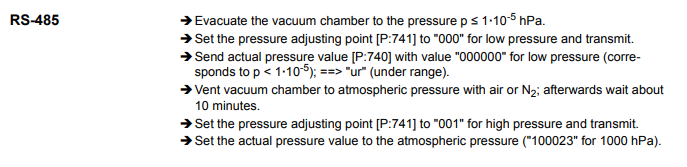

In [40]:
vac.read_pressure()


1000.0 hPa 750.0637554192106 Torr


In [41]:
print(vac.read_error())


NO_ERROR


In [42]:
# req=pvp._send_data_request(vac.ser,1, 740)
# raddr, rw, rparam_num, rdata = pvp._read_gauge_response(vac.ser, valid_char_filter=None)
# print(rdata)
# print(req)

In [43]:
# addr =1
# param_num = 740
# c = "{:03d}00{:03d}02=?".format(addr, param_num)
# c += "{:03d}\r".format(sum([ord(x) for x in c]) % 256)

# print(c)

In [44]:
# 
vac.pressure_setpoint('0')
vac.read_pressure()

1000.0 hPa 750.0637554192106 Torr


In [45]:
print(vac.correction_factor())


1.0


In [46]:
vac.correction_factor(1.0)
print(vac.correction_factor())


1.0


In [47]:
vac.close()

### Temperature Controls

Troubleshooting: 
Issues:
- Unable to establish connection betwen computer and temperature controller.
Possible reasons: 
Connector incompatibility: RS232 vs RS485 interface configuration. 

Issue Resolution:
- The salient issue ws the physical connection between the temp controller and computer.
- The adapter used to convert the 9-pin RS232 to USB had a RS485. So when I tried using existing python scripts and the existing LabView Driver with that adapter they didn't work.
- The solution directly connecting the 9-pin connector to the only serial port on the computer.

Takeaways:
- Looking up numbers on the cable and connector heads can help determine the wiring configuration, and cable type.
- The existing cables in the lab are null modem cables which do have RS232 physical configuration.
- When trying to establish a connection between hardware and computer, first eliminate posible wiring issues completely will save a lolt of time and headaches. 


Note Requires pip install of minimalmodbus.py 
eurotherm_source.py:

Note from Author of python script below, (script includes list of parameters):
- All class attribute are already available, but for commodity, I'm exposing here some of the most used parameters.
- All the other attributes can directly be called (read and written ) by instance.param

In [48]:
import pld_controlsystem_python.eurotherm_source as es

In [49]:
tempctrl = es.eurotherm2408(serialPort='COM1', baudrate=9600)

Guessing of the floating point data format


In [50]:
current_temperature = tempctrl.temperature

reading 21.294965744018555 from device at register 1 


In [51]:
#tempctrl.setpoint
#tempctrl.setpoint = 23.7

In [52]:
tempctrl.rampRate

reading -4.591774807899561e-41 from device at register 161 


-4.591774807899561e-41

In [53]:
tempctrl.rampRate = 0.1

writing 0.1 to device at register 161 
writing 0.1 to device at register 161 


In [54]:
tempctrl.setpoint

reading 23.0 from device at register 2 


23.0

In [55]:
tempctrl.temperature
tempctrl.rampUnit = 'min'
tempctrl.rampRate = 5
#seems like ramp rate setter is not working
tempctrl.rampRate

reading 21.287460327148438 from device at register 1 
reading 1 from device at register 531 
reading 1 from device at register 531 
writing 5 to device at register 161 
writing 5 to device at register 161 
reading -4.591774807899561e-41 from device at register 161 


-4.591774807899561e-41

In [56]:
tempctrl.programmerState
tempctrl.programmerState = 16

'eurotherm2408' object has no attribute 'Program_Status'


In [57]:
tempctrl.close()

### Throttle Valve: Pressure Controls
MKS 651C Pressure Controller: Self Tuning 
#### Intro

The controller has a control range of $10^{-4}$ to 760 mTorr

The pressure units available include: Torr, mTorr, mbar, Pascal, kPa, $cmH_{2}O$, $H_2O$ 

There are 5 reprogrammable Setpoints

The following function are also available on the Front Panel: Valve Open, Valve Close, and Stop.

Before Running Script go throught the followign checklist:
- Go to computer device manger and confirm the COM Port number for the pressure controller.
- Make sure the key in the Front Panel of the pressure controller is turned to remote.

Manual was easy enough to find. 
Functions in python script are based on:
- RS232 formatting information can be found in Chapter 6 on page 64 
- the table of Commands can be found in Table 26 on page 132
- the table of Information requests can be found in Table 27 on page 138

In [58]:
import pld_controlsystem_python.pressure_ctrl as pc

In [65]:
pressurectrl = pc.PressureControls(port='COM11', baudrate=9600)

In [67]:
pressurectrl.software_version_request()

'No response'

In [68]:
pressurectrl.send_request('R38', 'H')

'No response'